In [1]:
from datetime import datetime
import os

from dasilva_space_weather_2023 import (
    load_footpoints,
    estimate_footpoint_distribution,
    plot_footpoint_distribution,
    SLIDING_WINDOW_LENGTH
)

# Check data directory exists
Check that the data directory exists (it might not if this repo was cloned from Github). If the data directory doesn't exist, please download it from the Zenodo link found in the paper.

In [2]:
if os.path.exists('./data'):
    print('Data directory found. Good to proceed!')
else:
    raise RuntimeError(
        'The data directory does not exist. It should be downloaded and renamed '
        'to "data" at the top-level. Please do this before continuing.'
    )

Data directory found. Good to proceed!


# Load Source Locations (Footpoints)
This section calls the `load_footpoints()` functon to load all source locations predicted over the entire WSA time period processed. Each time we make a prediction, we will take a subset of this for the associated time window.

In [3]:
df_fp = load_footpoints('data/March2010_ACE/PREDSOLARWIND', 'AGONG')

Found 36 files containing footpoints:
    AGONGfield_line4R000.dat
    AGONGfield_line4R001.dat
    AGONGfield_line4R002.dat
    AGONGfield_line4R003.dat
    AGONGfield_line4R004.dat
    AGONGfield_line4R005.dat
    AGONGfield_line4R006.dat
    AGONGfield_line4R007.dat
    AGONGfield_line4R008.dat
    AGONGfield_line4R009.dat
    AGONGfield_line4R010.dat
    AGONGfield_line4R011.dat
    mAGONGfield_line4R000.dat
    mAGONGfield_line4R001.dat
    mAGONGfield_line4R002.dat
    mAGONGfield_line4R003.dat
    mAGONGfield_line4R004.dat
    mAGONGfield_line4R005.dat
    mAGONGfield_line4R006.dat
    mAGONGfield_line4R007.dat
    mAGONGfield_line4R008.dat
    mAGONGfield_line4R009.dat
    mAGONGfield_line4R010.dat
    mAGONGfield_line4R011.dat
    pAGONGfield_line4R000.dat
    pAGONGfield_line4R001.dat
    pAGONGfield_line4R002.dat
    pAGONGfield_line4R003.dat
    pAGONGfield_line4R004.dat
    pAGONGfield_line4R005.dat
    pAGONGfield_line4R006.dat
    pAGONGfield_line4R007.dat
    pAGONGfiel

In [4]:
display_cols = ['juldate', 'lon_footpoint', 'lat_footpoint']

df_fp[display_cols].head()

,juldate,lon_footpoint,lat_footpoint
0,2010-03-04 14:10:45.119990,4.7520,-74.0925
1,2010-03-04 14:10:45.119990,2.2976,-73.9493
2,2010-03-04 14:10:45.119990,5.9469,-74.3906
3,2010-03-04 14:33:30.240005,15.1384,-73.8419
4,2010-03-04 14:33:30.240005,17.8874,-73.8939


# Take Subset for Time Window around Prediction Time

In [5]:
prediction_time = datetime(2010, 3, 20, 20)
start_window = prediction_time - SLIDING_WINDOW_LENGTH / 2
stop_window = prediction_time + SLIDING_WINDOW_LENGTH / 2

df_window = df_fp[(df_fp.juldate > start_window) & (df_fp.juldate < stop_window)]
df_window[display_cols].head()

,juldate,lon_footpoint,lat_footpoint
14094,2010-03-20 08:03:24.480015,132.7256,-20.6228
14095,2010-03-20 08:03:24.480015,132.1741,-20.1995
14096,2010-03-20 08:03:24.480015,133.0186,-20.9473
14097,2010-03-20 08:14:21.119986,132.6711,-20.8091
14098,2010-03-20 08:14:21.119986,133.1499,-21.2576


# Generate the Probability Map
This esction uses a function `estimate_footpoint_distribution()` to compute the relative probability distribution. The core of this function uses the Scikit-Learn class [sklearn.neighbors.KernelDensity](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html). Our function returns three arrays:
- `prob_map` (2D array of relative probability values in [0, 1])
- `prob_map_lon` (the longitudes associated with `prob_map`, in radians)
- `prob_map_lat` (the latitudes associated with `prob_map`, in radians)

In [6]:
prob_map, prob_map_lon, prob_map_lat = estimate_footpoint_distribution(prediction_time, df_window)

# Plot the Probability Map

The `plot_footpoint_distribution()` function is used to plot the distribution. This function uses [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) to handle map projection and the dual longitude axis labeling. The fits file passed is used to plot the background magnetogram.

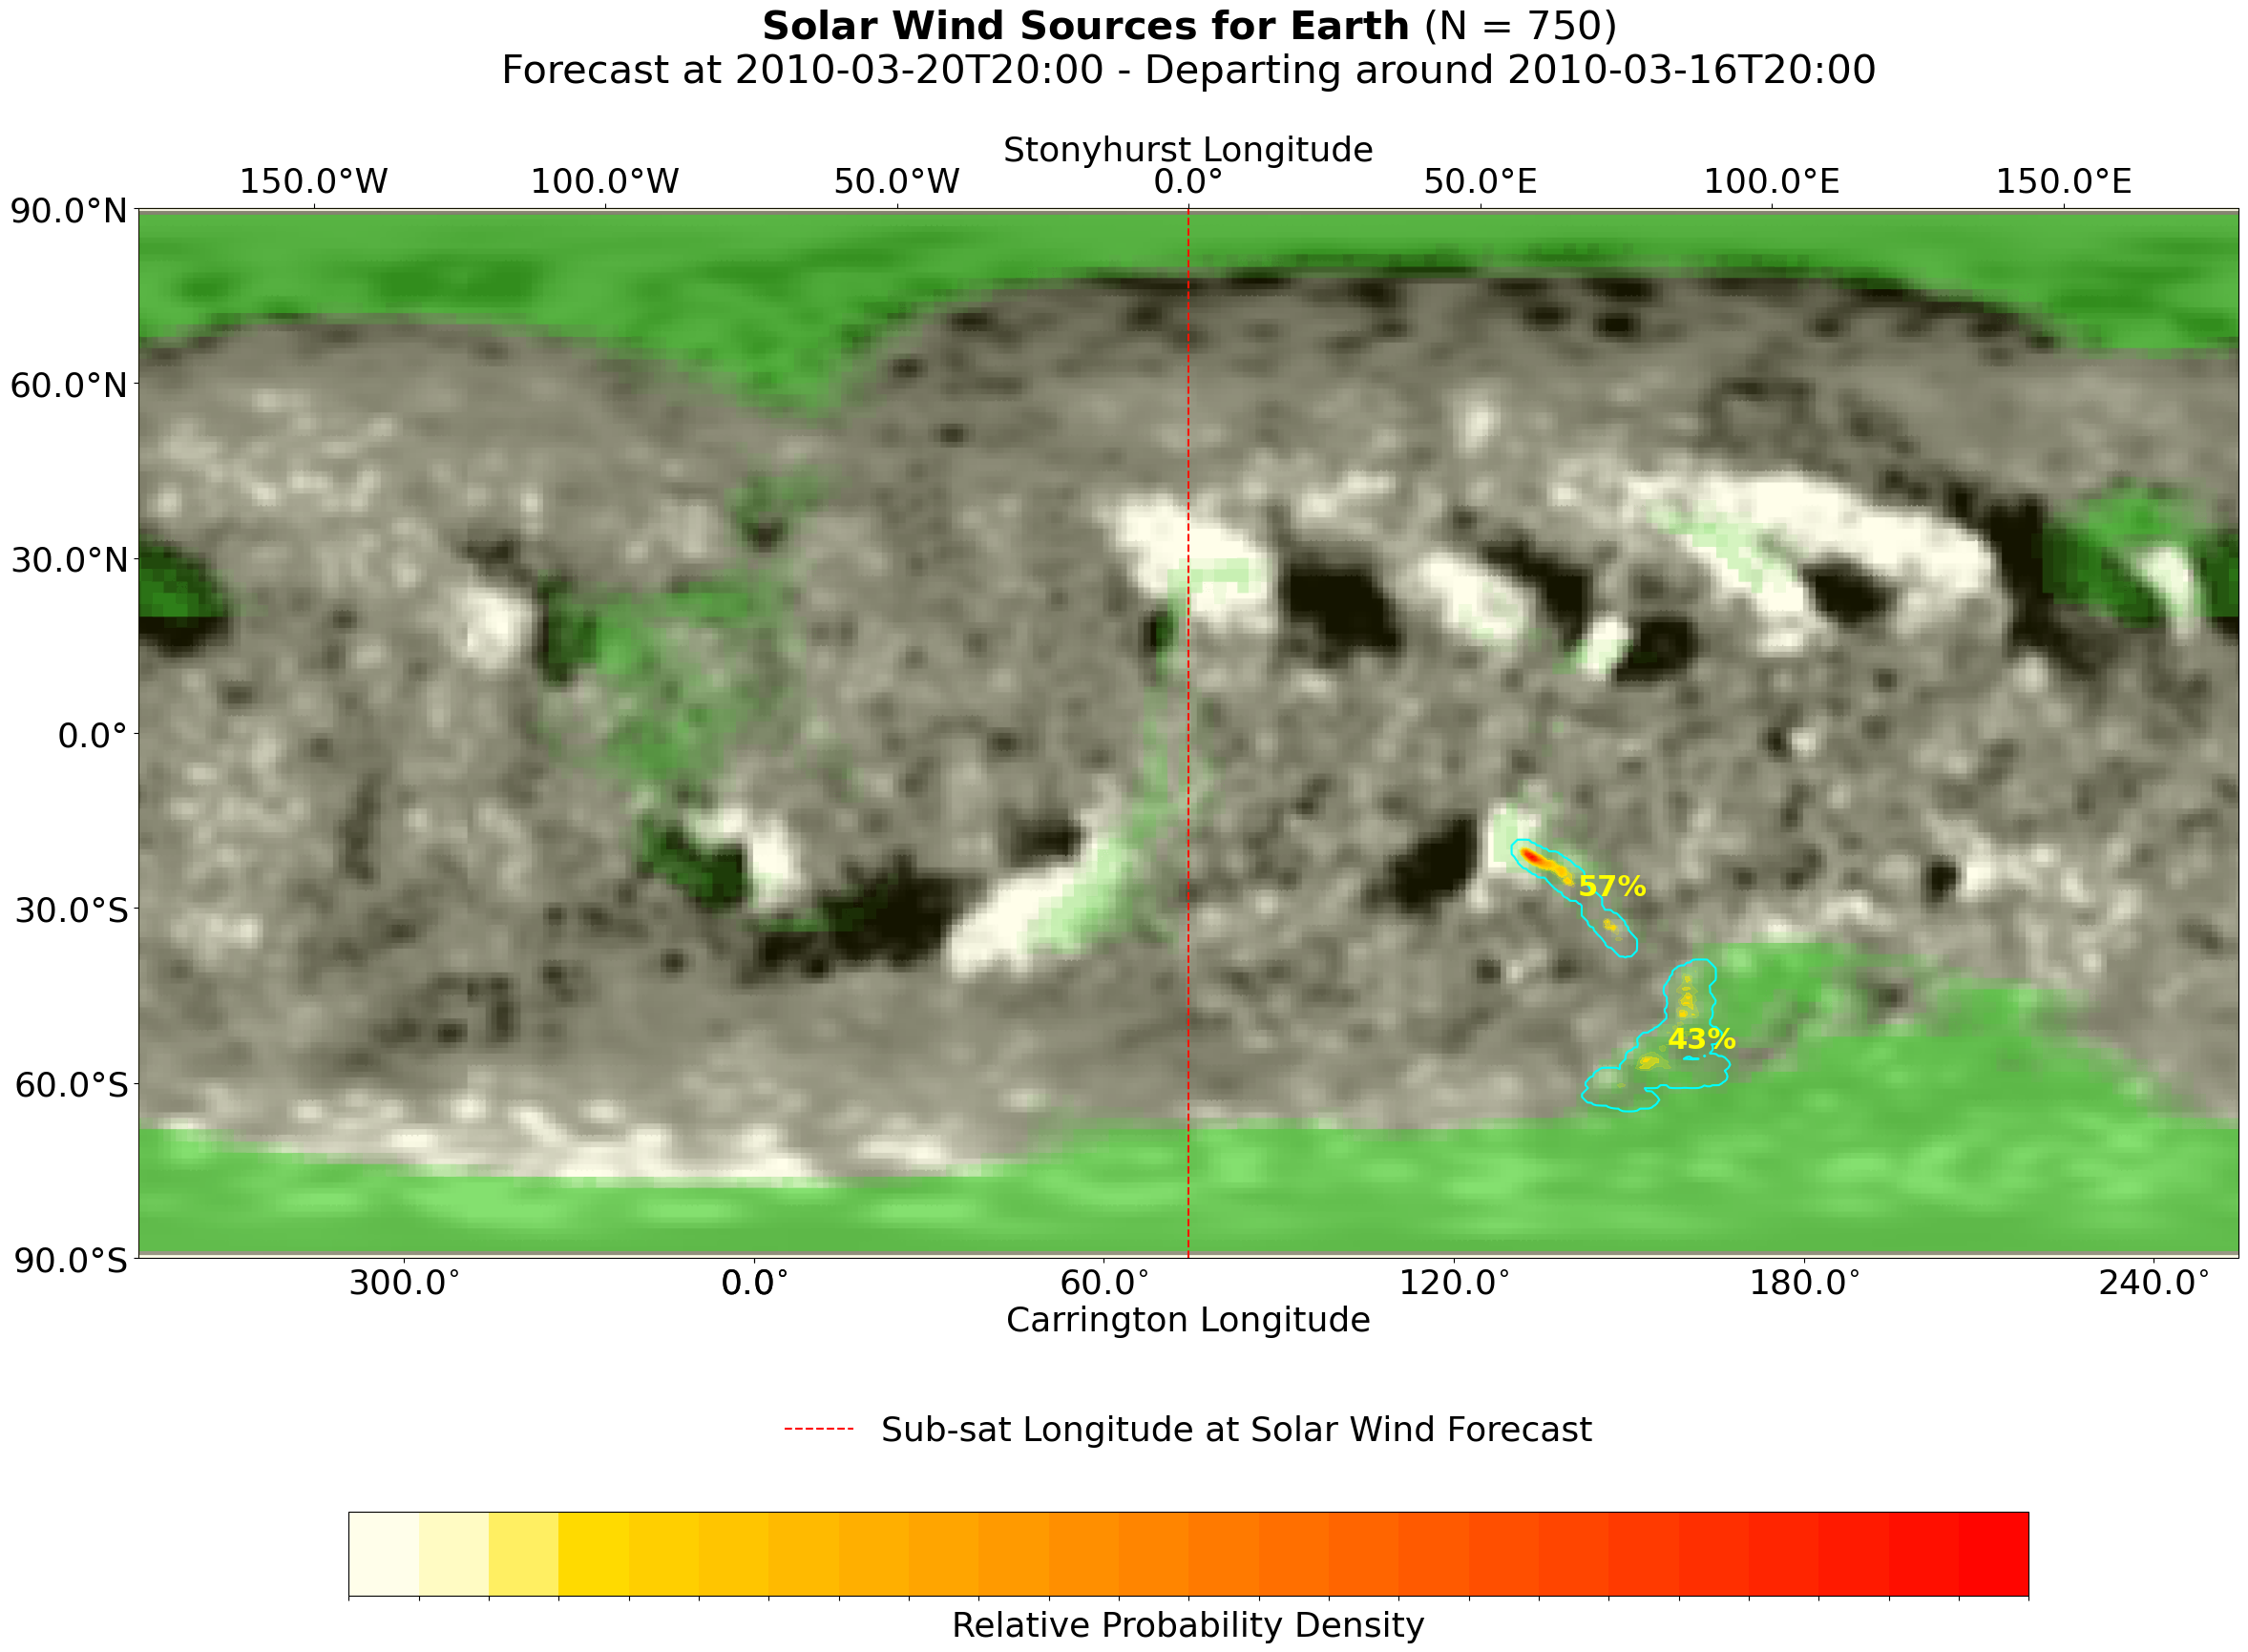

In [7]:
plot_footpoint_distribution(
    df_window, prob_map, prob_map_lon, prob_map_lat, prediction_time,
    'Earth', 'data/March2010_ACE/CORONA', 
)